# Heart Failure Prediction

## Objective
The primary goal of this project is to predict heart failure. This involves analyzing patient data to identify key indicators and risk factors associated with heart failure. 

## Business Understanding
Heart failure is a chronic and progressive condition in which the heart muscle is unable to pump blood effectively enough to meet the body's needs. This impairment in cardiac function can lead to a variety of symptoms and complications, impacting the overall quality of life. 

By identifying patients at high risk of heart failure early, healthcare providers can implement preventive measures and personalized treatment plans. This proactive approach can lead to better patient outcomes and reduced mortality rates.

## Data Understanding
The dataset contains the medical records of 5000 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features. 

#### Attribute Information: 
- **age**: age of the patient (years)
- **anaemia**: decrease of red blood cells or hemoglobin (boolean)
- **creatinine phosphokinase (CPK)**: level of the CPK enzyme in the blood (mcg/L)
- **diabetes**: if the patient has diabetes (boolean)
- **ejection fraction**: percentage of blood leaving the heart at each contraction (percentage)
- **high blood pressure**: if the patient has hypertension (boolean)
- **platelets**: platelets in the blood (kiloplatelets/mL)
- **sex**: woman or man (binary)
- **serum creatinine**: level of serum creatinine in the blood (mg/dL)
- **serum sodium**: level of serum sodium in the blood (mEq/L)
- **smoking**: if the patient smokes or not (boolean)
- **time**: follow-up period (days)
- **DEATH_EVENT**: if the patient died during the follow-up period (boolean)

### Loading the data

In [1]:
#importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing csv file
data = pd.read_csv("heart_failure.csv")

In [3]:
#Checking first 10 rows of the data 
data.head(10)

,age,Anaemia,creatinine_phosphokinase,DIABETES,Ejection_fraction,High_Blood_Pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,No,748.0,No,45.0,No,263358.03,1.3,137.0,Male,Smoker,88.0,No
1,65.0,No,56.0,No,25.0,No,305000.00,5.0,130.0,Male,Non-Smoker,207.0,No
2,45.0,No,582.0,Yes,38.0,No,319000.00,0.9,140.0,Female,Non-Smoker,244.0,No
3,60.0,Yes,754.0,Yes,40.0,Yes,328000.00,1.2,126.0,Male,Non-Smoker,90.0,No
4,95.0,Yes,582.0,No,30.0,No,461000.00,2.0,132.0,Male,Non-Smoker,50.0,Yes
5,70.0,No,232.0,Yes,30.0,No,302000.00,1.2,132.0,Male,Non-Smoker,210.0,No
6,63.0,Yes,122.0,Yes,60.0,No,172000.00,1.2,145.0,Female,Non-Smoker,147.0,No
7,70.0,Yes,171.0,No,50.0,Yes,358000.00,0.9,141.0,Female,Non-Smoker,196.0,No
8,50.0,No,482.0,Yes,30.0,No,300000.00,0.9,132.0,Male,Non-Smoker,109.0,No
9,53.0,Yes,446.0,No,45.0,Yes,274000.00,1.0,133.0,Male,Non-Smoker,215.0,No


In [4]:
#Checking bottom 10 rows of the data
data.tail(10)

,age,Anaemia,creatinine_phosphokinase,DIABETES,Ejection_fraction,High_Blood_Pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
5009,75.0,No,119.0,No,50.0,Yes,248000.0,1.1,148.0,Male,Non-Smoker,209.0,No
5010,53.0,Yes,582.0,No,45.0,No,305000.0,1.1,137.0,Male,Smoker,209.0,No
5011,65.0,Yes,335.0,No,35.0,Yes,235000.0,0.8,136.0,Female,Non-Smoker,120.0,No
5012,60.0,Yes,582.0,No,30.0,Yes,127000.0,0.9,145.0,Female,Non-Smoker,95.0,No
5013,65.0,Yes,160.0,Yes,20.0,No,327000.0,2.7,116.0,Female,Non-Smoker,8.0,Yes
5014,45.0,No,582.0,Yes,55.0,No,543000.0,1.0,132.0,Female,Non-Smoker,250.0,No
5015,60.0,Yes,582.0,No,30.0,Yes,127000.0,0.9,145.0,Female,Non-Smoker,95.0,No
5016,95.0,Yes,112.0,No,40.0,Yes,196000.0,1.0,138.0,Female,Non-Smoker,24.0,Yes
5017,65.0,Yes,160.0,Yes,20.0,No,327000.0,2.7,116.0,Female,Non-Smoker,8.0,Yes
5018,40.0,No,244.0,No,45.0,Yes,275000.0,0.9,140.0,Female,Non-Smoker,174.0,No


In [5]:
### Checking the shape of a data frame
data.shape

(5019, 13)

### Inspecting the dataset

In [6]:
#Quick inspection of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5019 entries, 0 to 5018
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   Anaemia                   5000 non-null   object 
 2   creatinine_phosphokinase  5000 non-null   float64
 3   DIABETES                  5000 non-null   object 
 4   Ejection_fraction         5000 non-null   float64
 5   High_Blood_Pressure       5000 non-null   object 
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   float64
 9   sex                       5000 non-null   object 
 10  smoking                   5000 non-null   object 
 11  time                      5000 non-null   float64
 12  DEATH_EVENT               5000 non-null   object 
dtypes: float64(7), object(6)
memory usage: 509.9+ KB


### Summary Statistics

In [7]:
#Summary of the data
data.describe()

,age,creatinine_phosphokinase,Ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,586.760600,37.734600,265075.404370,1.369106,136.808200,130.678800
std,11.697243,976.733979,11.514855,97999.758622,1.009750,4.464236,77.325928
min,40.000000,23.000000,14.000000,25100.000000,0.500000,113.000000,4.000000
25%,50.000000,121.000000,30.000000,215000.000000,0.900000,134.000000,74.000000
50%,60.000000,248.000000,38.000000,263358.030000,1.100000,137.000000,113.000000
75%,68.000000,582.000000,45.000000,310000.000000,1.400000,140.000000,201.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.400000,148.000000,285.000000


In [8]:
# Summary statistics for categorical features
data.describe(include="object")

,Anaemia,DIABETES,High_Blood_Pressure,sex,smoking,DEATH_EVENT
count,5000,5000,5000,5000,5000,5000
unique,5,2,2,4,5,2
top,No,No,No,Male,Non-Smoker,No
freq,2624,2803,3176,3226,3440,3432


## Missing values Analysis

age                         19
Anaemia                     19
creatinine_phosphokinase    19
DIABETES                    19
Ejection_fraction           19
High_Blood_Pressure         19
platelets                   19
serum_creatinine            19
serum_sodium                19
sex                         19
smoking                     19
time                        19
DEATH_EVENT                 19
dtype: int64


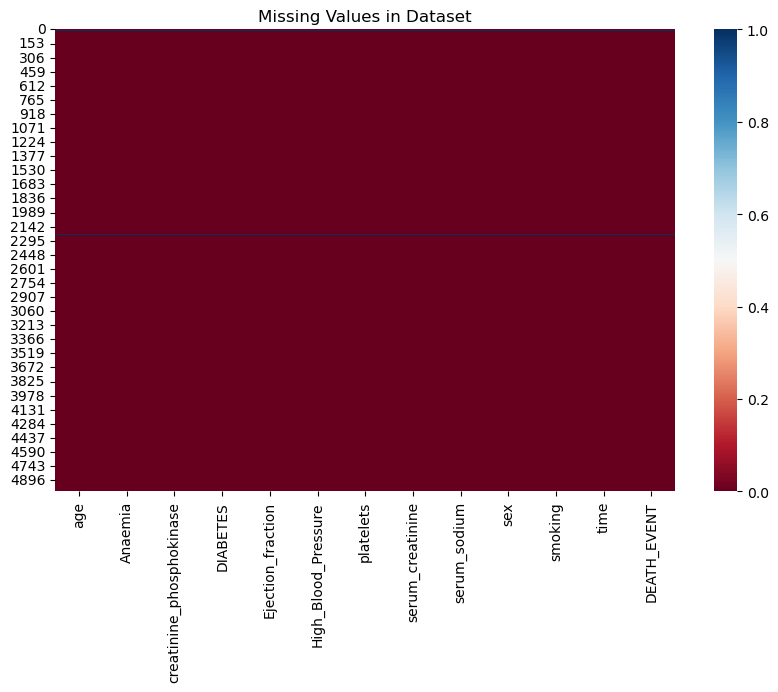

In [9]:
# Check the total number of null values in each column
null_counts = data.isnull().sum()

# Print the count of missing values
print(null_counts)

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='RdBu')
plt.title('Missing Values in Dataset')
plt.show()

In [10]:
#Removing all blank rows
data = data.dropna(how='all')

age                         0
Anaemia                     0
creatinine_phosphokinase    0
DIABETES                    0
Ejection_fraction           0
High_Blood_Pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


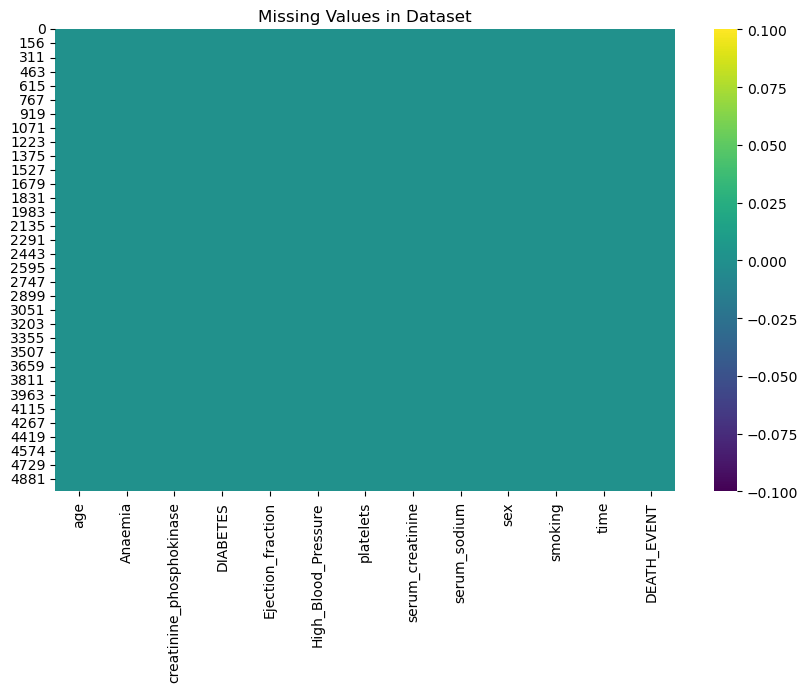

In [11]:
# Confirming Null removals

# Checking the total number of null values in each column
null_counts = data.isnull().sum()

# Store the count of missing values in a variable
missing_values = null_counts

# Print the count of missing values
print(missing_values)

# Visualize the missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values in Dataset')
plt.show()

## Data Cleaning

In [12]:
# Checking columns
data.columns

Index(['age', 'Anaemia', 'creatinine_phosphokinase', 'DIABETES',
       'Ejection_fraction', 'High_Blood_Pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### Renaming Columns

In [13]:
#Renaming columns
data.rename({"Anaemia":"anaemia"},axis=1, inplace=True)
data.rename({"DIABETES":"diabetes"},axis=1, inplace=True)
data.rename({"Ejection_fraction":"ejection_fraction"},axis=1, inplace=True)
data.rename({"High_Blood_Pressure":"high_blood_pressure"},axis=1, inplace=True)
data.rename({"DEATH_EVENT":"death_event"},axis=1, inplace=True)

In [14]:
# Inspecting column names
for col in data.columns:
    print(col)

age
anaemia
creatinine_phosphokinase
diabetes
ejection_fraction
high_blood_pressure
platelets
serum_creatinine
serum_sodium
sex
smoking
time
death_event


In [15]:
# Removing whitespaces from all columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [16]:
#Quick inspection of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5018
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   object 
 2   creatinine_phosphokinase  5000 non-null   float64
 3   diabetes                  5000 non-null   object 
 4   ejection_fraction         5000 non-null   float64
 5   high_blood_pressure       5000 non-null   object 
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   float64
 9   sex                       5000 non-null   object 
 10  smoking                   5000 non-null   object 
 11  time                      5000 non-null   float64
 12  death_event               5000 non-null   object 
dtypes: float64(7), object(6)
memory usage: 546.9+ KB


In [17]:
# Rounding the 'age' column to 0 decimal places
data['age'] = data['age'].round(0)

#### Changing data types

In [18]:
# Converting the 'age' column data type from float to int
data['age'] = data['age'].astype('int64')

# Converting the 'creatinine_phosphokinase' column data type from float to int
data['creatinine_phosphokinase'] = data['creatinine_phosphokinase'].astype('int64')

# Converting the 'ejection_fraction' column data type from float to int
data['ejection_fraction'] = data['ejection_fraction'].astype('int64')

# Converting the 'serum_sodium' column data type from float to int
data['serum_sodium'] = data['serum_sodium'].astype('int64')

# Converting the 'time' column data type from float to int
data['time'] = data['time'].astype('int64')

# Converting the 'death_event' column data type from float to category
data['death_event'] = data['death_event'].astype('category')

# Converting the 'anaemia' column data type from float to category
data['anaemia'] = data['anaemia'].astype('category')

# Converting the 'diabetes' column data type from float to category
data['diabetes'] = data['diabetes'].astype('category')

# Converting the 'high_blood_pressure' column data type from float to category
data['high_blood_pressure'] = data['high_blood_pressure'].astype('category')

# Converting the 'sex' column data type from float to category
data['sex'] = data['sex'].astype('category')

# Converting the 'smoking' column data type from float to category
data['smoking'] = data['smoking'].astype('category')

#### Inspecting data types

In [19]:
#Inspecting data types
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 5018
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       5000 non-null   int64   
 1   anaemia                   5000 non-null   category
 2   creatinine_phosphokinase  5000 non-null   int64   
 3   diabetes                  5000 non-null   category
 4   ejection_fraction         5000 non-null   int64   
 5   high_blood_pressure       5000 non-null   category
 6   platelets                 5000 non-null   float64 
 7   serum_creatinine          5000 non-null   float64 
 8   serum_sodium              5000 non-null   int64   
 9   sex                       5000 non-null   category
 10  smoking                   5000 non-null   category
 11  time                      5000 non-null   int64   
 12  death_event               5000 non-null   category
dtypes: category(6), float64(2), int64(5)
memory usage: 34

In [20]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55,No,748,No,45,No,263358.03,1.3,137,Male,Smoker,88,No
1,65,No,56,No,25,No,305000.00,5.0,130,Male,Non-Smoker,207,No
2,45,No,582,Yes,38,No,319000.00,0.9,140,Female,Non-Smoker,244,No
3,60,Yes,754,Yes,40,Yes,328000.00,1.2,126,Male,Non-Smoker,90,No
4,95,Yes,582,No,30,No,461000.00,2.0,132,Male,Non-Smoker,50,Yes


In [21]:
#Checking for the number of  duplicate entries
data.duplicated().sum()

3680

In [22]:
data.shape

(5000, 13)

## Data Visualization

#### Distribution of Numerical Columns

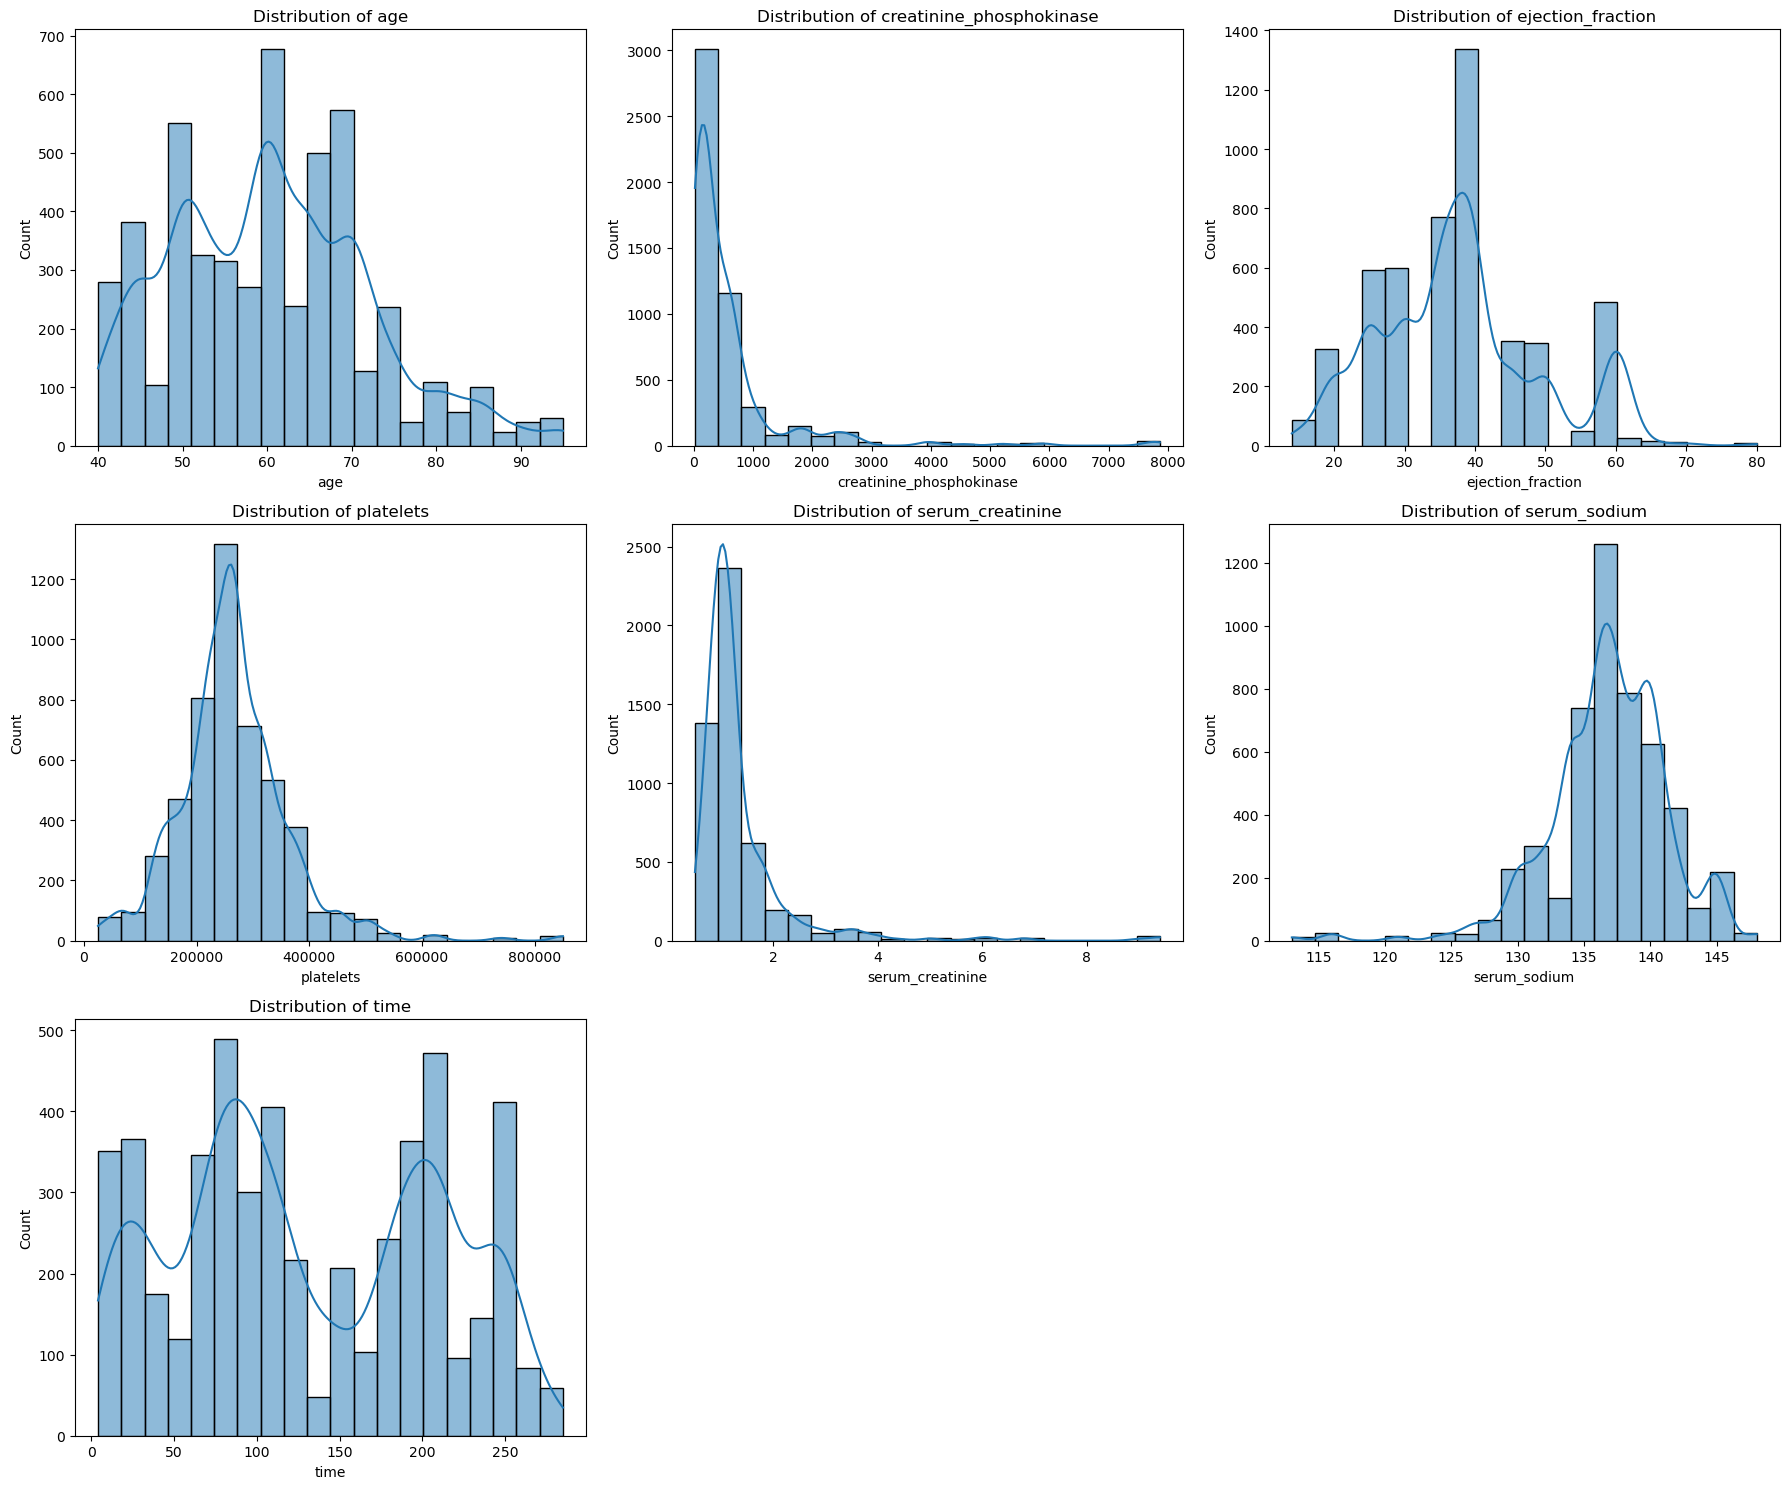

In [23]:
# Numerical columns
num_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Set the figure size and layout for 3 columns per row
num_rows = (len(num_cols) + 2) // 3  # Calculate the number of rows needed
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 5 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Histograms for numerical columns using Seaborn
for i, col in enumerate(num_cols):
    ax = axes[i]
    sns.histplot(data[col], bins=20, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

plt.savefig("distribution.jpeg")
plt.show()


The distribution of age is roughly uniform between 40 and 80 years, with peaks around 50, 60, and 70 years, indicating that the dataset includes a wide age range with several age groups being more represented.

The distribution of creatinine_phosphokinase is highly skewed to the right, with most values clustered below 1000 and a few extreme outliers reaching up to 7000. This suggests a few patients have significantly higher levels of creatinine phosphokinase.

The distribution of ejection_fraction is somewhat bimodal, with peaks around 30-40 and 60-70, indicating two distinct groups in the dataset regarding ejection fraction values.

The distribution of platelets is fairly normal, centered around 250,000, with a range from 0 to 800,000. Most patients have platelet counts between 150,000 and 350,000.

The distribution of serum creatinine is highly skewed to the right, with the majority of values being low but a few high outliers. This suggests that most patients have normal kidney function, but a few have significantly impaired kidney function.

The distribution of serum sodium levels is fairly normal with a slight right skew, centered around 135. Most values fall within a narrow range, indicating relatively stable sodium levels among patients.

The distribution of time (indicating follow-up period or time to event) appears somewhat uniform with several peaks, suggesting that there are certain follow-up times or event times that are more common, possibly due to the design of the study or clinical follow-up schedules.

#### Count Plots for Categorical Variables

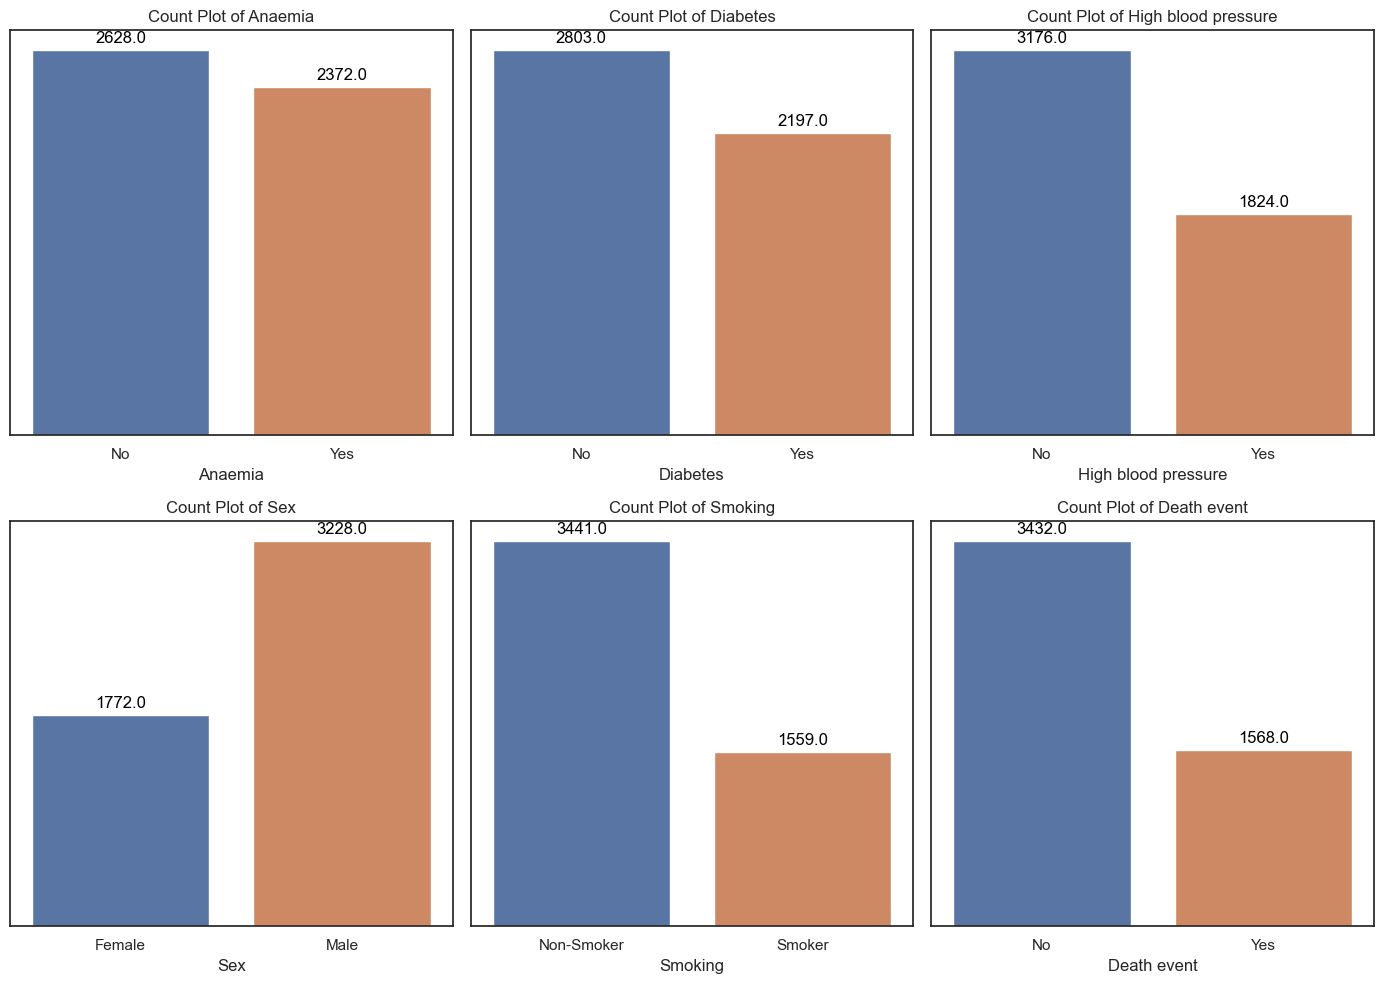

In [24]:
# Count plots for categorical variables
categorical_vars = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

# Set the style of the visualization
sns.set(style="white")

plt.figure(figsize=(14, 10))
for i, var in enumerate(categorical_vars):
    plt.subplot(2, 3, i+1)
    ax = sns.countplot(x=var, data=data)
    plt.title(f'Count Plot of {var.replace("_", " ").capitalize()}')
    plt.xlabel(var.replace("_", " ").capitalize())
    plt.ylabel('')  # Remove the y-axis label
    ax.yaxis.set_visible(False)  # Remove the y-axis
    ax.grid(False)  # Remove the gridlines
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.savefig("countplot.jpeg")
plt.show()

There are more male patients (3228) than female patients (1772) in the dataset.

There are slightly more patients without anaemia (2628) compared to those with anaemia (2372). The difference is not very significant, suggesting anaemia is relatively evenly distributed in the dataset.

There are more patients without diabetes (2803) than with diabetes (2197).

There are significantly more patients without high blood pressure (3176) compared to those with high blood pressure (1824).

There are more non-smokers (3441) compared to smokers (1559).

here are more patients who did not experience a death event (3432) compared to those who did (1568).

#### Box PLot for Continuous Variables

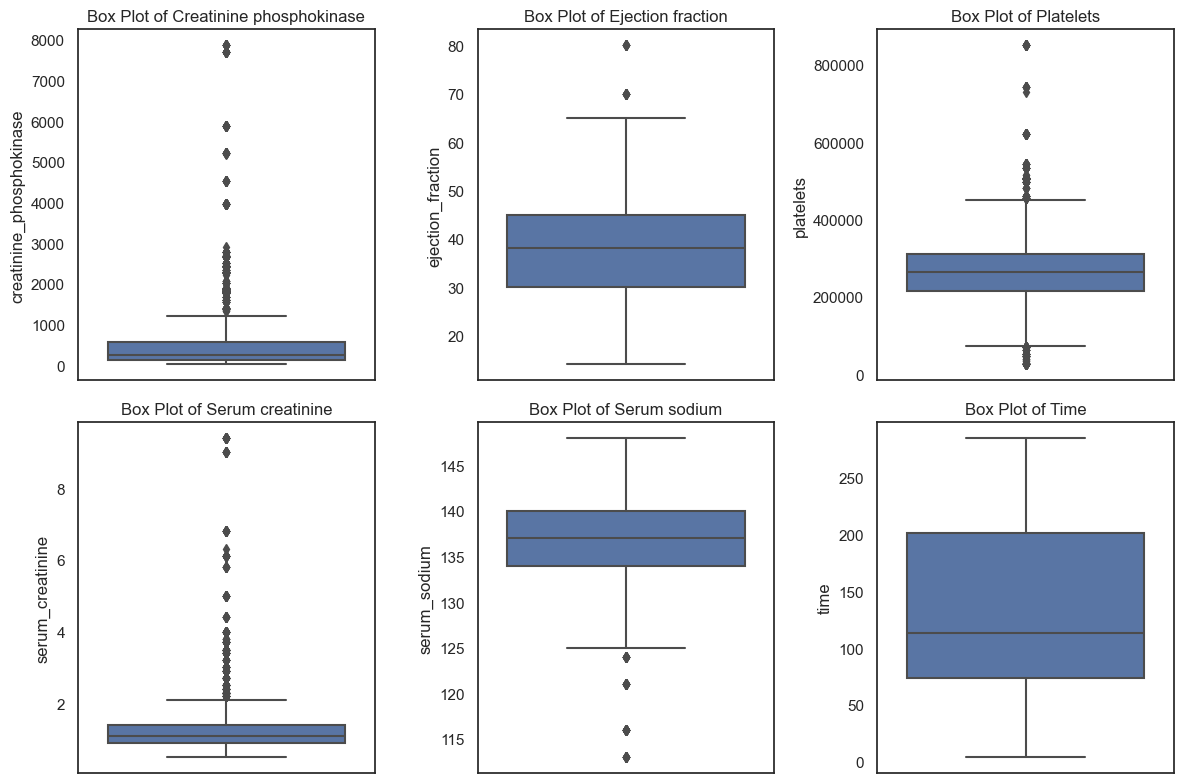

In [25]:
# Box plots for continuous variables
continuous_vars = ['creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(12, 8))
for i, var in enumerate(continuous_vars):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=var, data=data)
    plt.title(f'Box Plot of {var.replace("_", " ").capitalize()}')
plt.tight_layout()
plt.savefig("boxplot.jpeg")
plt.show()

Creatinine_phosphokinase shows a highly skewed distribution with many outliers above 1000, reaching up to around 8000. Most values lie below 250, indicating that while a majority of patients have low levels, there are some with significantly higher levels.

Ejection_fraction shows a relatively interquartile range (IQR) from around 30 to 45, with a few outliers reaching up to 80. This suggests that most patients have an ejection fraction within this range, but some have much higher values.

Platelets shows a normal distribution centered around 250,000, with several outliers above 400,000 and a few below 50,000. This indicates that while most patients fall within a typical range, there are some with abnormally high or low platelet counts.

Serum_creatinine shows a right-skewed distribution with many outliers above 1.5, reaching up to around 9. Most values lie below 2, indicating that while most patients have low levels, some have significantly higher levels.

Serum_sodium shows a relatively tight distribution around the median of 137, with a few outliers below 130 and above 145. This suggests that most patients have serum sodium levels within a normal range.

Time (representing follow-up duration or time until an event) shows a wide distribution with an IQR from around 50 to 200, and no significant outliers. This suggests a wide variation in the time variable among patients.

#### Encoding categorical variables

In [26]:
# Encode categorical variables using LabelEncoder
label_encoders = {}
categorical_columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [27]:
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,55,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


#### Heat Map For Numerical Columns

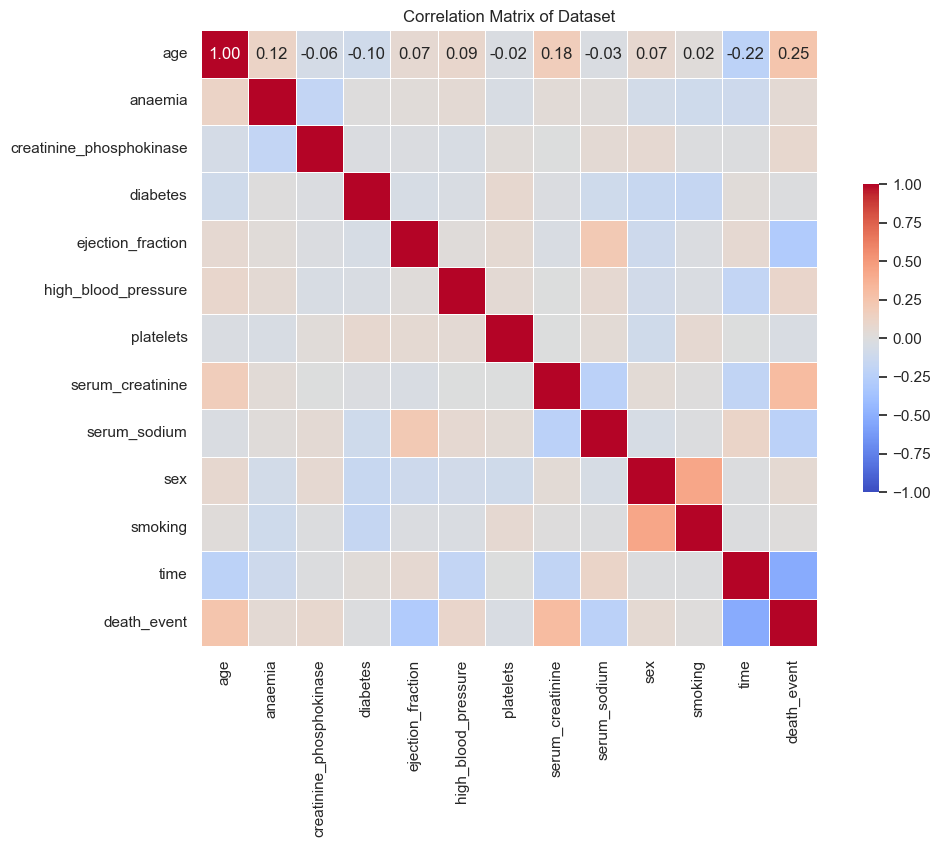

In [28]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5, square=True, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Dataset')
plt.savefig("heatmap.jpeg")
plt.show()

Age has a positive correlation with serum_creatinine (0.18) and death_event (0.25). This suggests that older patients tend to have higher serum creatinine levels and a higher likelihood of death events.

Anaemia has a slight positive correlation with creatinine_phosphokinase (0.12) and serum_creatinine (0.07). This indicates that patients with anaemia may have slightly higher levels of these biomarkers.

Creatinine Phosphokinase does not show a strong correlation with any other variables, indicating that its levels are relatively independent of other factors in this dataset.

Diabetes shows a slight positive correlation with high_blood_pressure (0.09) and a slight negative correlation with smoking (-0.10). This suggests that diabetic patients are slightly more likely to have high blood pressure and are slightly less likely to smoke.

Ejection fraction shows a moderate negative correlation with serum_creatinine (-0.22), indicating that patients with lower ejection fractions tend to have higher serum creatinine levels.

High blood pressure shows a slight positive correlation with platelets (0.07) and serum_creatinine (0.07). This suggests a weak relationship between high blood pressure and these biomarkers.

Platelets do not show strong correlations with other variables, indicating relative independence in this dataset.

Serum creatinine has a moderate negative correlation with ejection_fraction (-0.22) and a positive correlation with death_event (0.25). This suggests that higher serum creatinine levels are associated with lower ejection fractions and a higher likelihood of death events.

Serum sodium shows slight positive and negative correlations with several variables, but none are strong enough to be particularly noteworthy.

Sex has a slight negative correlation with smoking (-0.22), indicating that females in the dataset are less likely to smoke compared to males.

Smoking has a slight positive correlation with diabetes (0.09), suggesting a weak relationship between smoking and diabetes prevalence.

Time shows a moderate negative correlation with death_event (-0.26), indicating that longer follow-up times are associated with lower death events, which is expected as patients who survive longer will naturally have longer follow-up times.

Death event is positively correlated with serum_creatinine (0.25) and negatively correlated with time (-0.26). This suggests that patients with higher serum creatinine levels are more likely to experience a death event, and those who survive longer are less likely to have a death event.

#### Pairwise Plot for Numerical Columns

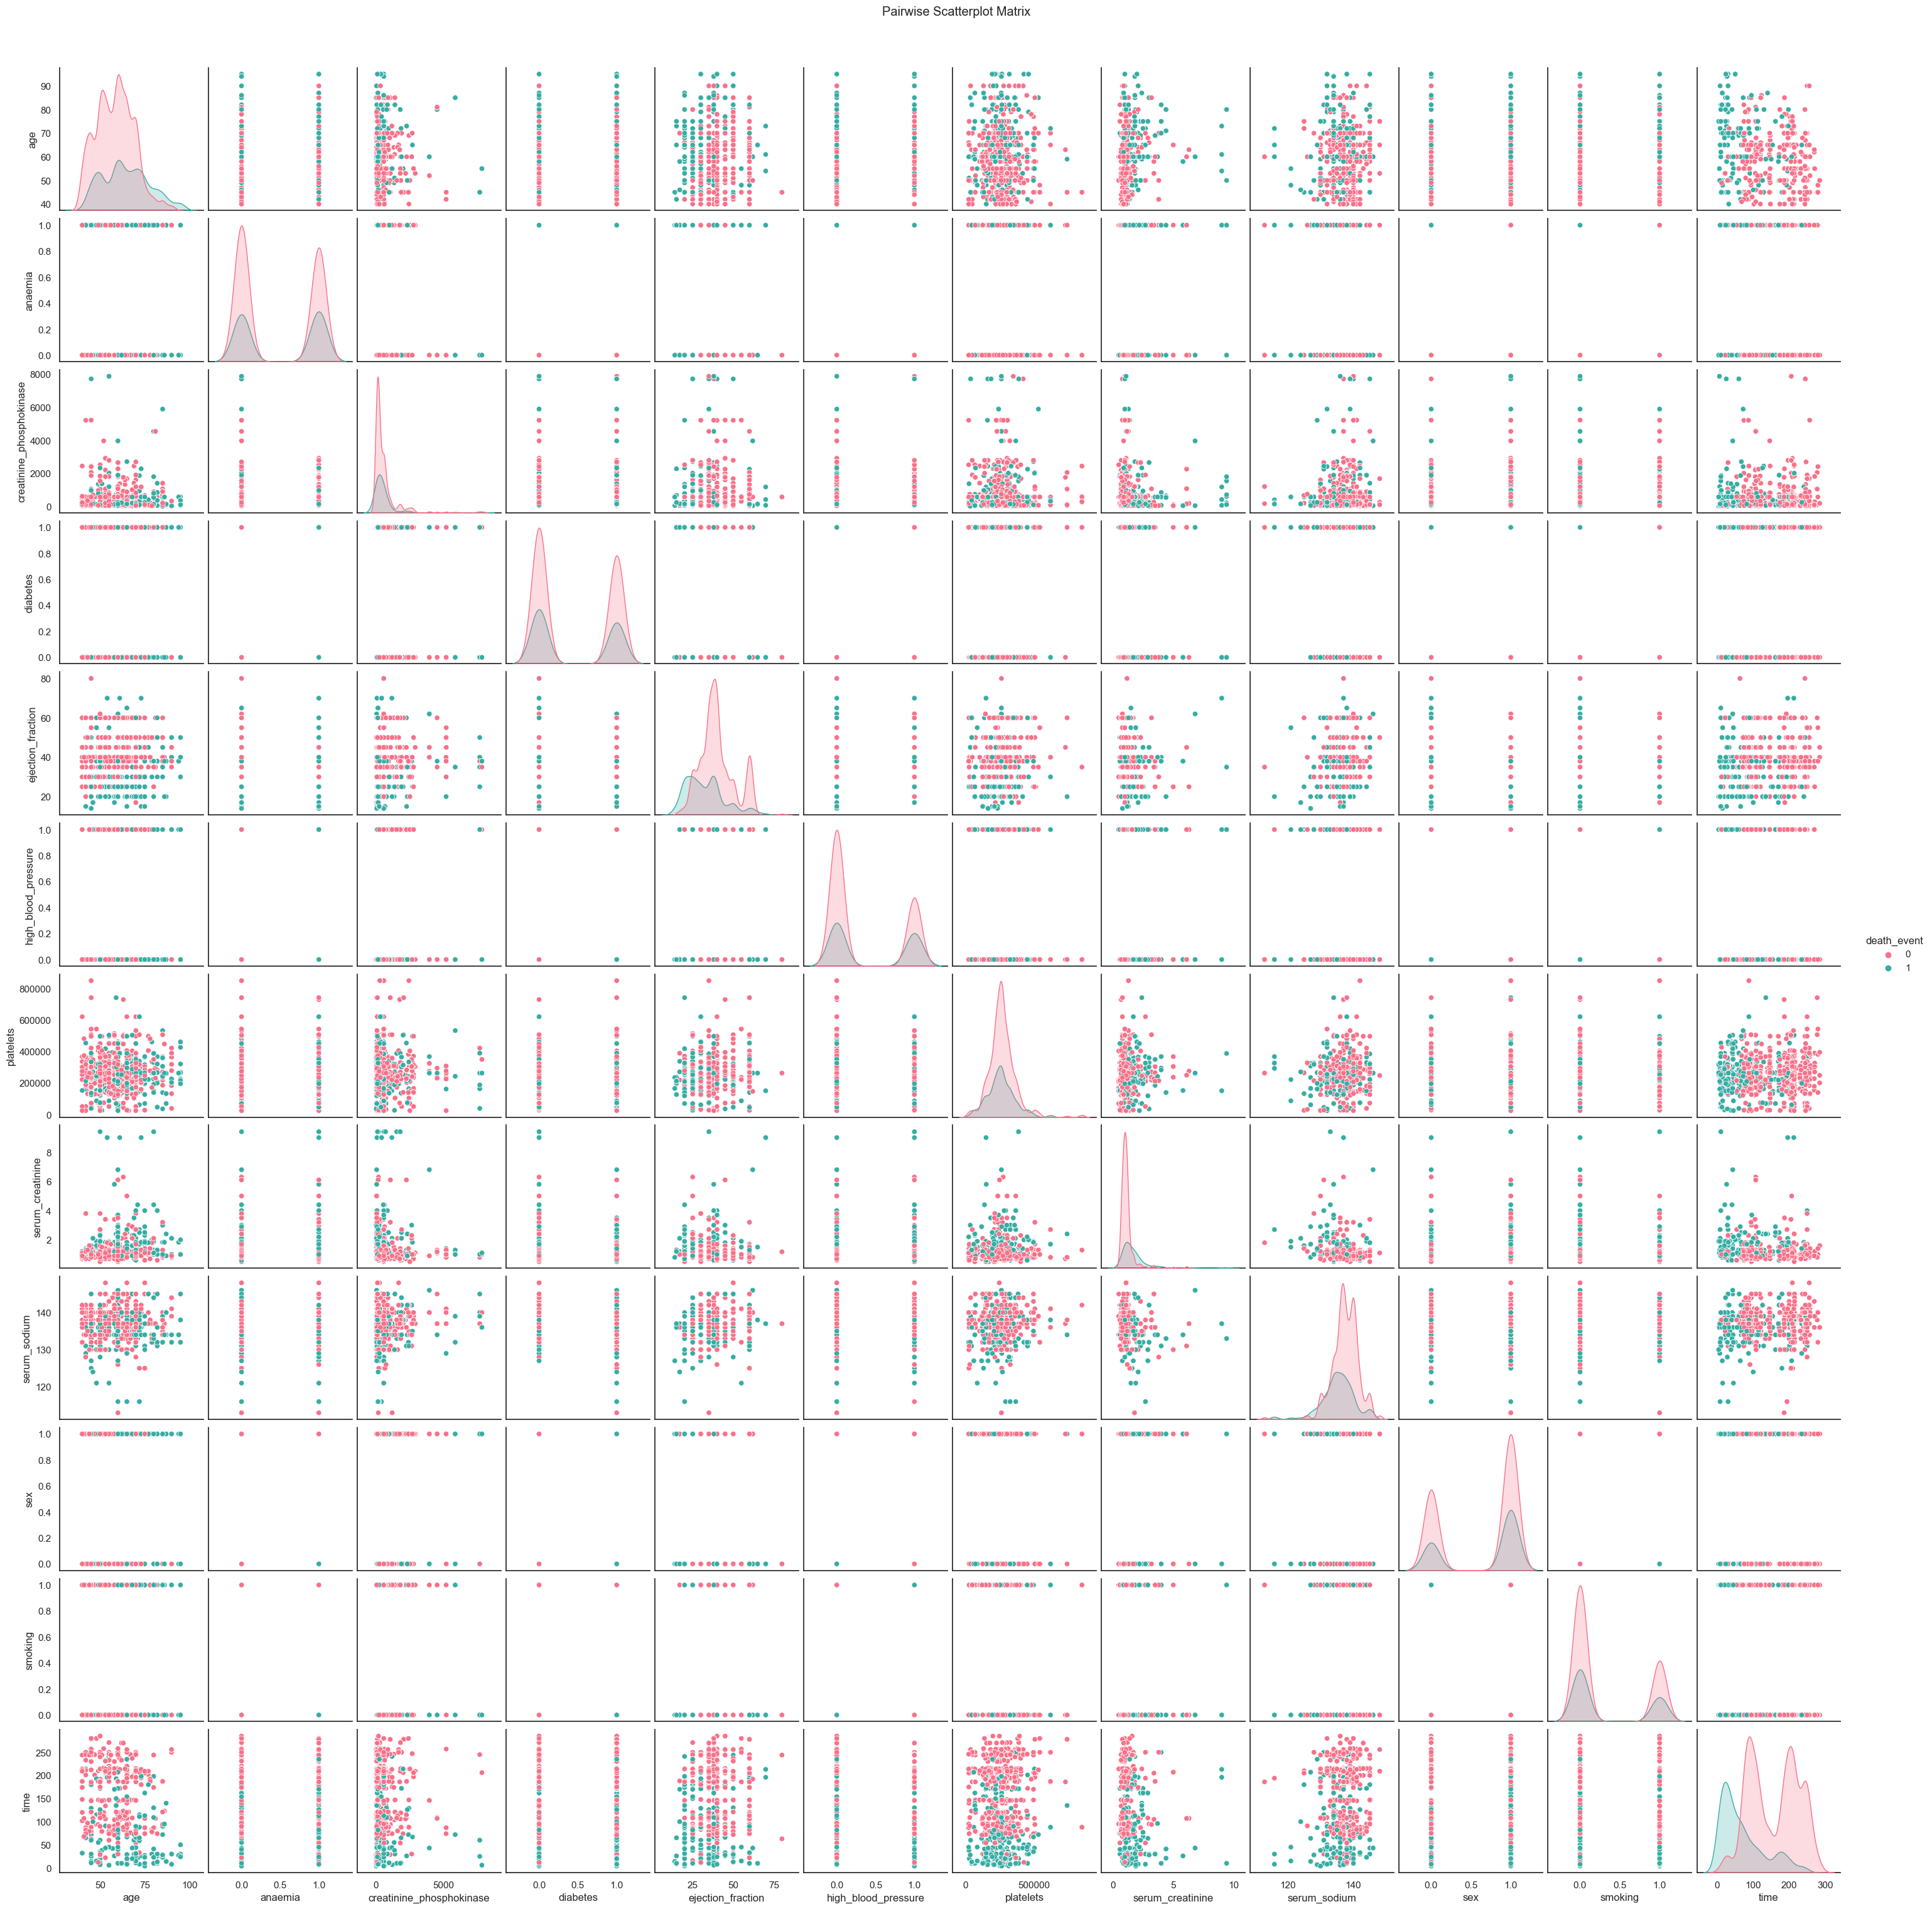

In [49]:
# Pairwise scatterplot matrix
sns.pairplot(data, hue='death_event', palette='husl')
plt.suptitle('Pairwise Scatterplot Matrix', y=1.02)
plt.savefig("pairwise.jpeg")
plt.show()

There are two prominent peaks in the age distribution of patients who did not experience a death event. In contrast, patients who experienced a death event are more evenly distributed across ages. No clear separation is visible between those who did and did not experience a death event based on age alone.

There is a wide range of creatinine phosphokinase levels in both groups. However, patients with higher levels of creatinine phosphokinase are more likely to have experienced a death event. The distribution is highly skewed, with most patients having lower levels of creatinine phosphokinase.

Patients with lower ejection fractions are more likely to have experienced a death event. There is a noticeable difference in the ejection fraction distributions between the two groups, with non-death event patients having higher ejection fractions on average.

The platelet count distributions are similar for both groups, indicating no strong relationship between platelet count and death event.

Higher serum creatinine levels are associated with a higher likelihood of experiencing a death event. The distribution shows that patients with death events tend to have higher serum creatinine levels compared to those without death events.

There is no clear separation in serum sodium levels between the two groups, suggesting a weak relationship between serum sodium levels and death event.
The distribution is similar for both groups.

Patients who did not experience a death event have a wider range and generally longer follow-up times compared to those who did experience a death event. This indicates that patients who survive longer tend to have a longer follow-up time, which is expected.

Some variables, like ejection fraction and serum creatinine, show noticeable differences between the two groups, suggesting they could be significant predictors of death events. Other variables, like platelets and serum sodium, do not show strong differentiation between the groups, indicating weaker predictive power for these variables. The scatter plots reveal some potential linear and non-linear relationships between the variables.

## Data Modelling

#### Separating the data into predictor variables and target variable

In [30]:
# 1. Separating the data into predictor variables (X) and target variable (y)
X = data.drop(['death_event'], axis =1)

y = data['death_event']

#### Standardizing predictor variables

In [31]:
# Step 2: Standardizing the predictor variables (X)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Optionally, if you want to convert it back to a DataFrame and keep the column names
X_standardized = pd.DataFrame(X_standardized, columns=X.columns)

#### Checking predictor variables

In [32]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,55,0,748,0,45,0,263358.03,1.3,137,1,1,88
1,65,0,56,0,25,0,305000.00,5.0,130,1,0,207
2,45,0,582,1,38,0,319000.00,0.9,140,0,0,244
3,60,1,754,1,40,1,328000.00,1.2,126,1,0,90
4,95,1,582,0,30,0,461000.00,2.0,132,1,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
5014,45,0,582,1,55,0,543000.00,1.0,132,0,0,250
5015,60,1,582,0,30,1,127000.00,0.9,145,0,0,95
5016,95,1,112,0,40,1,196000.00,1.0,138,0,0,24
5017,65,1,160,1,20,0,327000.00,2.7,116,0,0,8


#### Checking target variable

In [33]:
y

0       0
1       0
2       0
3       0
4       1
       ..
5014    0
5015    0
5016    1
5017    1
5018    0
Name: death_event, Length: 5000, dtype: int32

#### Splitting data into train dataset and test dataset

In [34]:
#  Splitting data into train dataset and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.20,random_state = 75)

#### Checking feature importance

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Use RandomForestClassifier to rank feature importance
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances = rf.feature_importances_

# Print feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print(feature_importances)

                     Feature  Importance
11                      time    0.394956
7           serum_creatinine    0.155310
4          ejection_fraction    0.112361
0                        age    0.078829
2   creatinine_phosphokinase    0.071315
8               serum_sodium    0.069579
6                  platelets    0.057275
5        high_blood_pressure    0.016288
10                   smoking    0.011705
3                   diabetes    0.011701
1                    anaemia    0.010500
9                        sex    0.010180


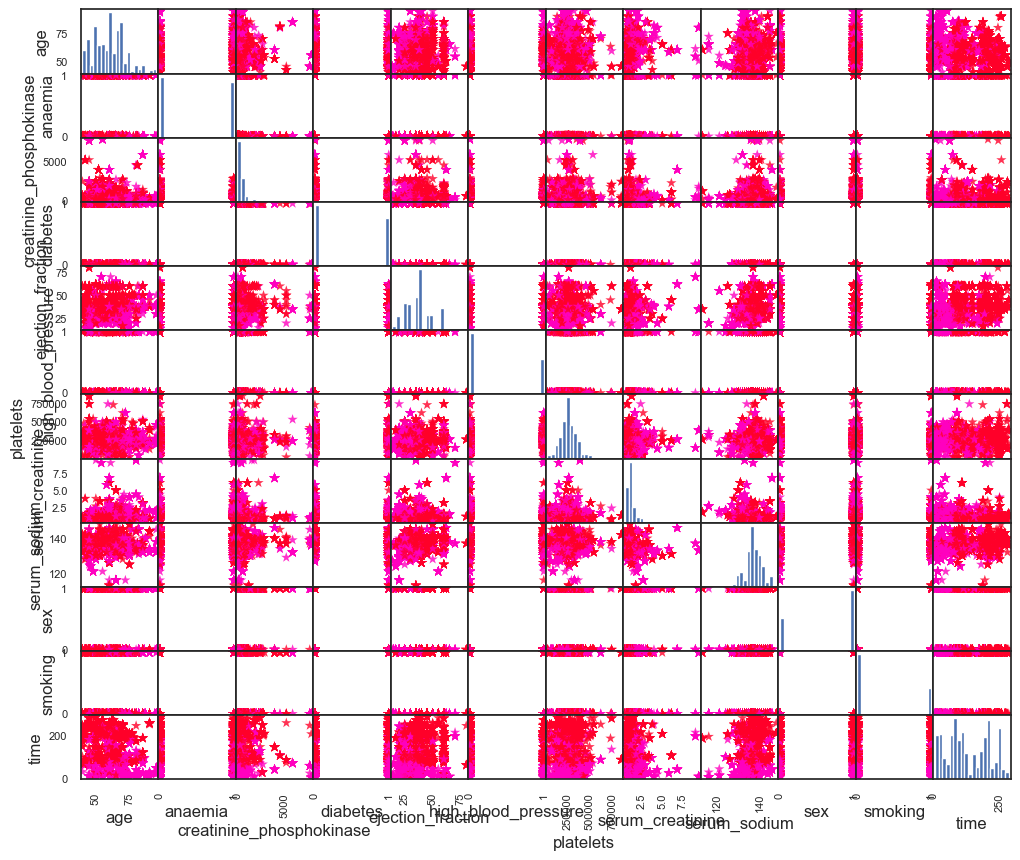

In [36]:
from matplotlib import cm #import matplotlib color map
pd.plotting.scatter_matrix(X_train,c=y_train, figsize=(12, 10), marker='*',
hist_kwds={'bins': 20}, s=60, alpha=.8, cmap = cm.get_cmap('gist_rainbow'))
plt.show()

### Building a Logistic Regression Model

In [37]:
#Instantiating the model
model = LogisticRegression()

#### Training the model

In [38]:
model.fit(X_train,y_train)

LogisticRegression()

#### Evaluating the model

In [39]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.822


The model provided a decent performance, achieving an accuracy of 82.2%. This indicates that the model is relatively effective at distinguishing between cases of heart failure and non-heart failure

### Building a Decision Tree Classification Model

In [40]:
#Instantiating the model
model = DecisionTreeClassifier()

#### Training the model

In [41]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluating the Model

In [42]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.986


The model showed exceptional performance with an accuracy of 98.9%. This suggests that the model can very accurately predict heart failure.

### Building a Random Forest CLassification Model

In [43]:
model = RandomForestClassifier()

#### Training the model

In [44]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluating the Model

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.992


The model also demonstrated high accuracy of 98.8%

### Building a Support Vector Machine (SVM) Model

In [46]:
#Instantiating the model
model = SVC()

#### Training the model

In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#### Evaluating the Model

In [48]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.686


The SVM model had the lowest accuracy among the models tested, at 68.6%

## Conclusion

In the Prediction heart failure, both the decision tree and random forest models significantly outperformed logistic regression and SVM. With accuracy scores nearing 99%, the decision tree and random forest models are highly effective at predicting heart failure cases within the dataset. The random forest, in particular, might be preferred due to its ability to reduce overfitting and increase generalization by averaging multiple decision trees.